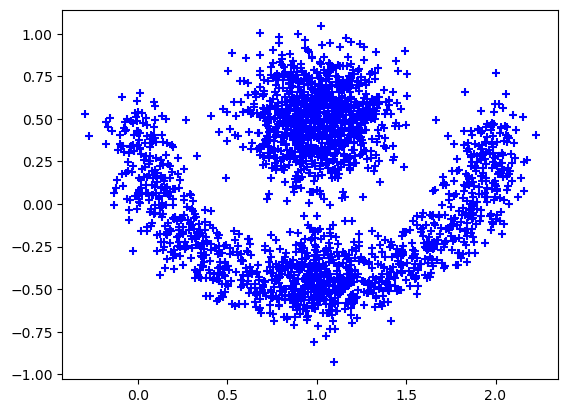

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# Read the Excel file
combined = pd.read_excel('combined_data.xlsx')

# Plot the scatter plot
plt.scatter(combined[0], combined[1], c='blue', s=40, marker='+')
plt.show()

In [2]:
import numpy as np
combined = combined.values
sample_size = int(len(combined) * 0.5)

# 随机选择索引进行下采样
indices = np.random.choice(len(combined), size=sample_size, replace=False)
downsampled_combined = combined[indices]

In [3]:
from sklearn.neighbors import NearestNeighbors
import math
def euclidean_distance(x1, x2):
     return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

def mean_shift(pixel_list, bandwidth, k):
    centroids = np.copy(pixel_list)
    # Create a k-NN model
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(pixel_list)
    
    for i, centroid in enumerate(centroids):
        # Find the k nearest neighbors of the centroid
        _, indices = knn.kneighbors([centroid])
        neighbors = pixel_list[indices[0]]
        
        # Calculate distances and weights using only the neighbors
        distances = euclidean_distance(neighbors, centroid)
        weights = np.exp(-0.5 * (distances / bandwidth) ** 2)
        
        # Update the centroid
        numerator = np.sum(neighbors * weights[:, np.newaxis], axis=0)
        denominator = np.sum(weights)
        centroids[i] = numerator / denominator
    
    return np.round(centroids, 3)

In [ ]:
# 创建一个包含两行三列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(22, 10))

# 带宽值列表
bandwidths = [0.1, 0.2, 0.3]
k=60
# 遍历每个带宽值
for i, bandwidth in enumerate(bandwidths):
    # 计算新的质心
    new_centroids = mean_shift(downsampled_combined, bandwidth,k)
    
    # 绘制散点图
    axs[0, i].scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='red', s=20, marker='+')
    axs[0, i].scatter(new_centroids[:, 0], new_centroids[:, 1], c='blue', s=40, marker='+')
    axs[0, i].set_title(f'Bandwidth = {bandwidth}')
    
    # 绘制箭头
    for j in range(len(new_centroids)):
        dx = new_centroids[j, 0] - downsampled_combined[j, 0]
        dy = new_centroids[j, 1] - downsampled_combined[j, 1]
        axs[1, i].arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], dx, dy, head_width=0.02, head_length=0.02, linewidth=0.02, fc='blue', ec='blue')
    axs[1, i].set_title(f'Bandwidth = {bandwidth}')

plt.tight_layout()
plt.show()

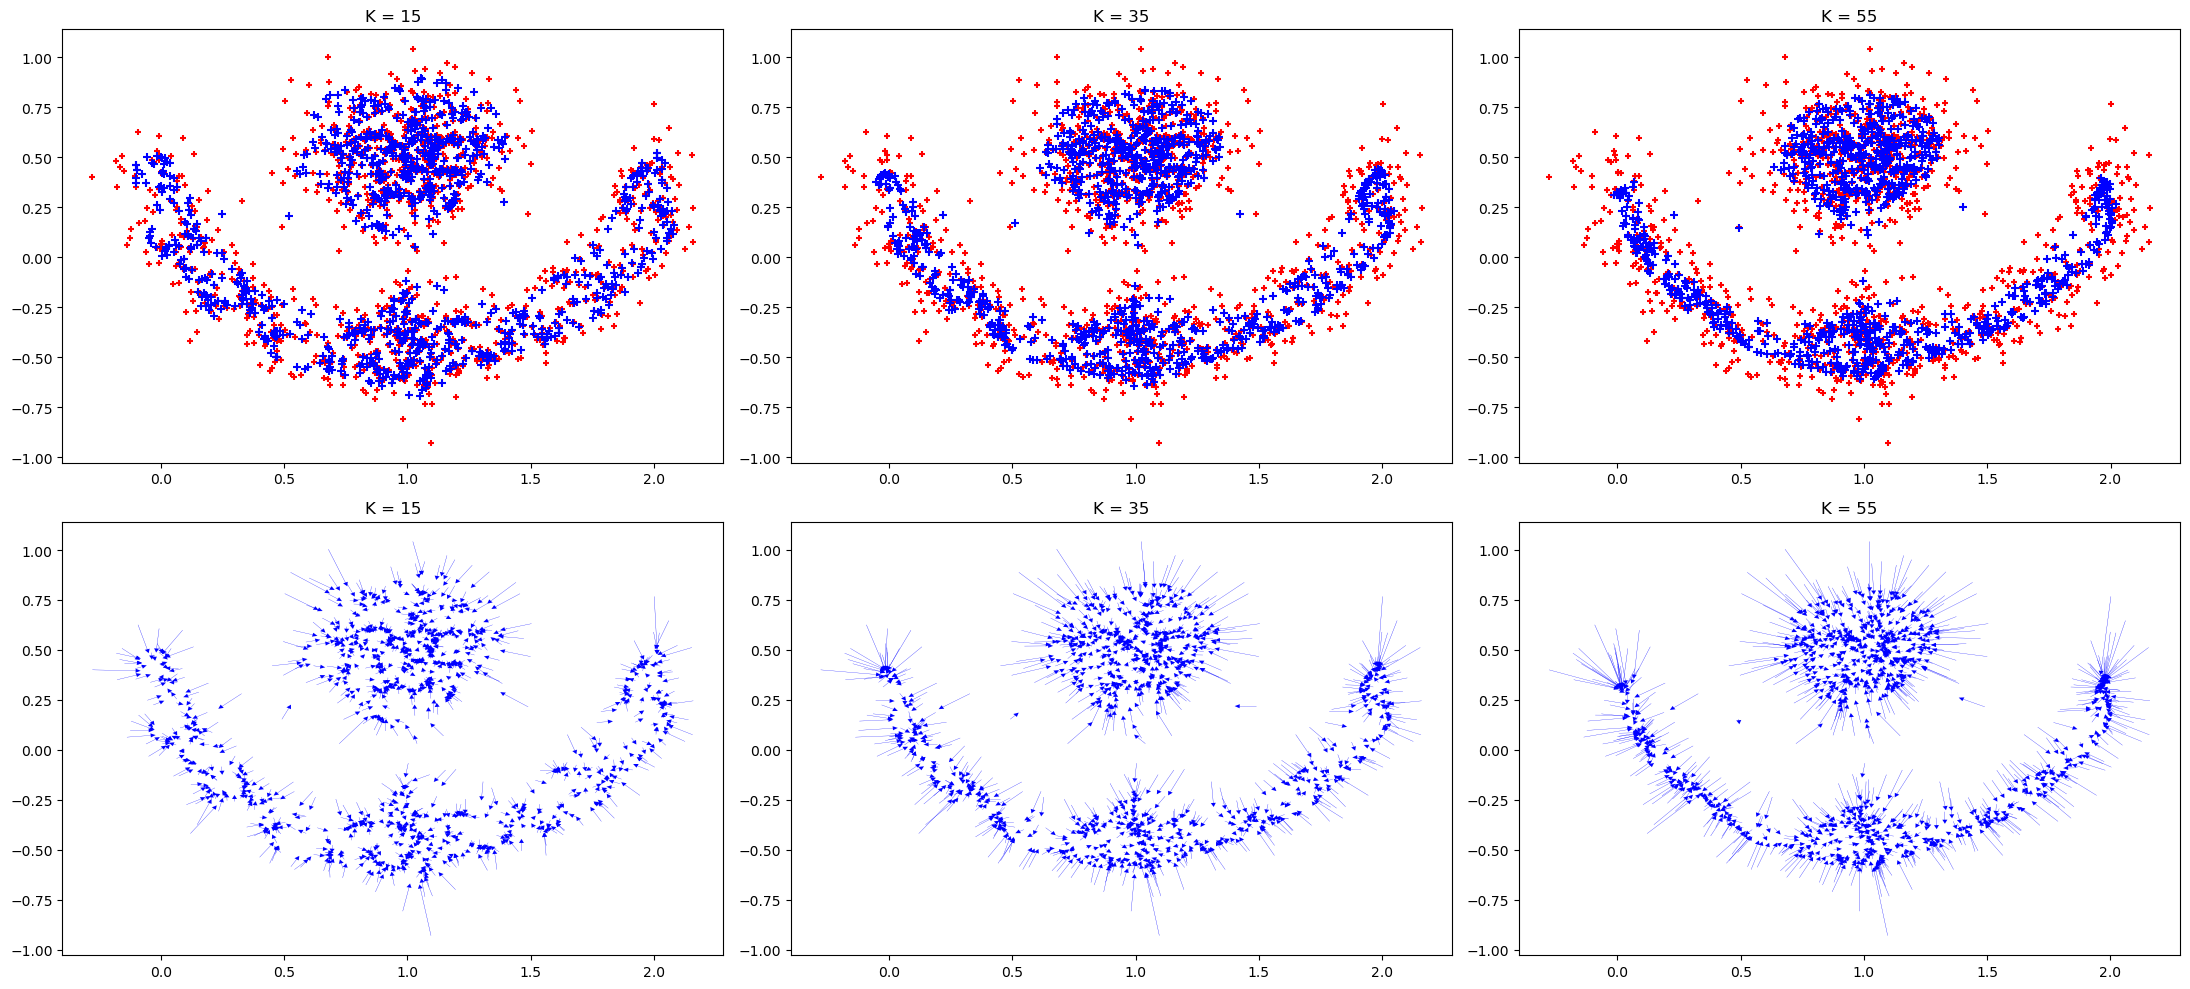

In [4]:
# 创建一个包含两行三列的子图布局
fig, axs = plt.subplots(2, 3, figsize=(22, 10))

# 带宽值列表
bandwidth = 1
ks=[15, 35,55]
# 遍历每个带宽值
for i, k in enumerate(ks):
    # 计算新的质心
    new_centroids = mean_shift(downsampled_combined, bandwidth,k)
    
    # 绘制散点图
    axs[0, i].scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='red', s=20, marker='+')
    axs[0, i].scatter(new_centroids[:, 0], new_centroids[:, 1], c='blue', s=40, marker='+')
    axs[0, i].set_title(f'K = {k}')
    
    # 绘制箭头
    for j in range(len(new_centroids)):
        dx = new_centroids[j, 0] - downsampled_combined[j, 0]
        dy = new_centroids[j, 1] - downsampled_combined[j, 1]
        axs[1, i].arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], dx, dy, head_width=0.02, head_length=0.02, linewidth=0.02, fc='blue', ec='blue')
    axs[1, i].set_title(f'K = {k}')

plt.tight_layout()
plt.show()

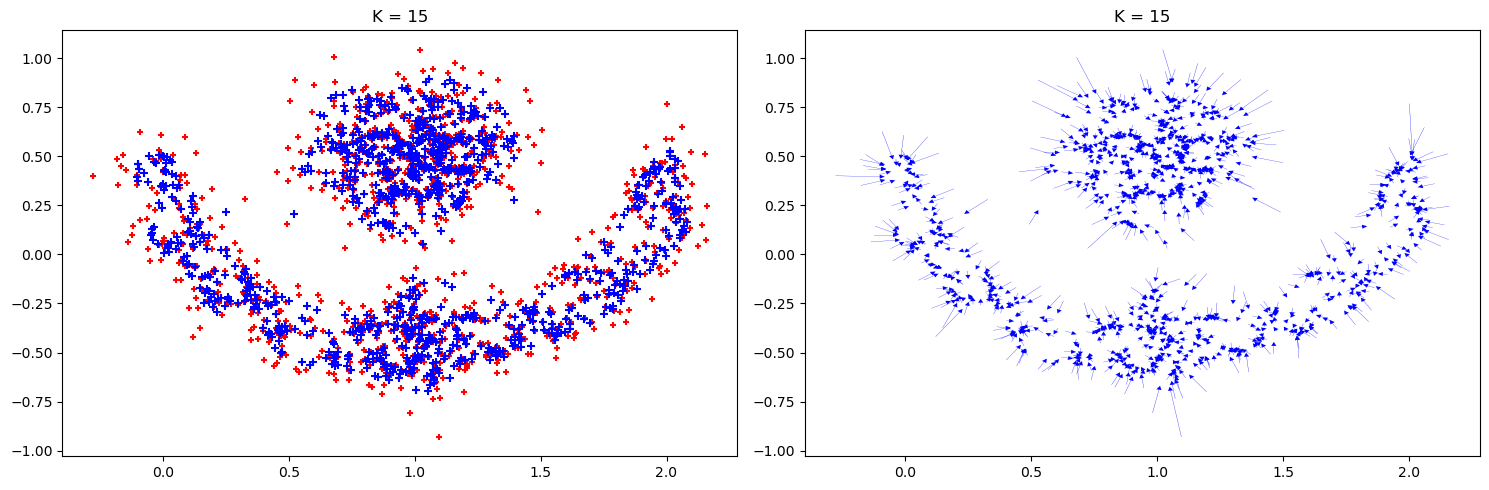

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# 带宽值列表
bandwidth = 1
k=15

# 计算新的质心
new_centroids_k15 = mean_shift(downsampled_combined, bandwidth,k)

# 绘制散点图
axs[0].scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='red', s=20, marker='+')
axs[0].scatter(new_centroids_k15[:, 0], new_centroids_k15[:, 1], c='blue', s=40, marker='+')
axs[0].set_title(f'K = {k}')

# 绘制箭头
for j in range(len(new_centroids)):
    dx = new_centroids_k15[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k15[j, 1] - downsampled_combined[j, 1]
    axs[1].arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], dx, dy, head_width=0.02, head_length=0.02, linewidth=0.02, fc='blue', ec='blue')
axs[1].set_title(f'K = {k}')

plt.tight_layout()
plt.show()

In [6]:
vector_k15 = []

for j in range(len(new_centroids)):
    dx = new_centroids_k15[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k15[j, 1] - downsampled_combined[j, 1]
    vector_k15.append([dx, dy])

vector_k15 = np.array(vector_k15)
vector_k15

array([[-0.00328522,  0.01021735],
       [ 0.02167866, -0.02138545],
       [-0.01073661,  0.00356477],
       ...,
       [-0.00872309, -0.05085954],
       [-0.0031633 , -0.01539264],
       [-0.01034517,  0.00846554]])

In [7]:
# 带宽值列表
bandwidth = 1
k=35

# 计算新的质心
new_centroids_k35 = mean_shift(downsampled_combined, bandwidth,k)

vector_k35 = []

for j in range(len(new_centroids)):
    dx = new_centroids_k35[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k35[j, 1] - downsampled_combined[j, 1]
    vector_k35.append([dx, dy])

vector_k35 = np.array(vector_k35)
vector_k35

array([[-0.00628522, -0.01878265],
       [ 0.00267866, -0.07338545],
       [-0.01173661, -0.00043523],
       ...,
       [-0.00672309, -0.07585954],
       [ 0.0078367 , -0.02339264],
       [ 0.00465483,  0.01346554]])

In [8]:
# 带宽值列表
bandwidth = 1
k=55

# 计算新的质心
new_centroids_k55 = mean_shift(downsampled_combined, bandwidth,k)

vector_k55 = []

for j in range(len(new_centroids)):
    dx = new_centroids_k55[j, 0] - downsampled_combined[j, 0]
    dy = new_centroids_k55[j, 1] - downsampled_combined[j, 1]
    vector_k55.append([dx, dy])

vector_k55 = np.array(vector_k55)
vector_k55

array([[ 0.01371478, -0.04878265],
       [ 0.02667866, -0.15638545],
       [-0.01073661, -0.00043523],
       ...,
       [-0.00872309, -0.05185954],
       [ 0.0368367 , -0.03139264],
       [-0.00134517,  0.00546554]])

In [9]:
Dvector_k35_k15 = vector_k35 - vector_k15
Dvector_k35_k15

array([[-0.003, -0.029],
       [-0.019, -0.052],
       [-0.001, -0.004],
       ...,
       [ 0.002, -0.025],
       [ 0.011, -0.008],
       [ 0.015,  0.005]])

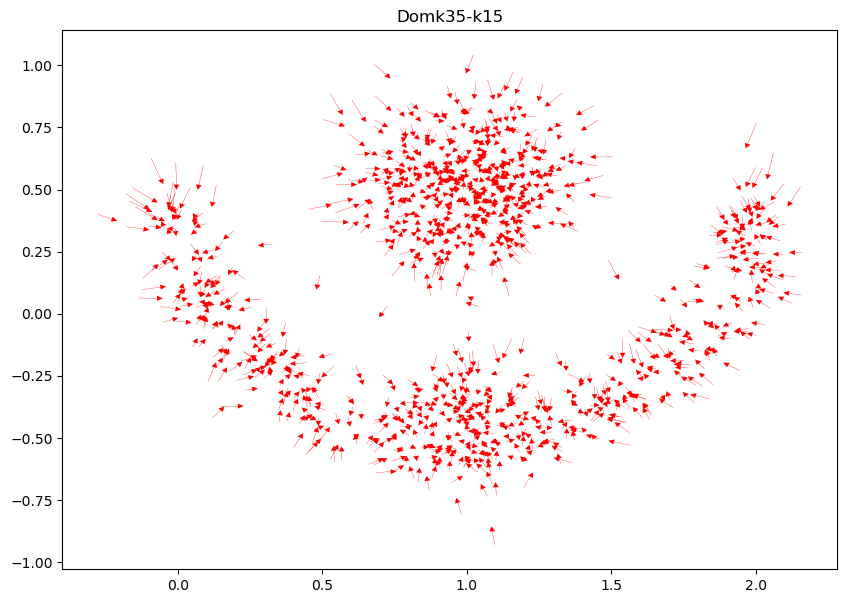

In [25]:
plt.figure(figsize=(10, 7))
# plt.scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='blue', s=20, marker='+')

# 绘制箭头
for j in range(len(downsampled_combined)):
    plt.arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], Dvector_k35_k15[j, 0], Dvector_k35_k15[j, 1], head_width=0.02, head_length=0.02, linewidth=0.02, fc='red', ec='red')
plt.title('Domk35-k15')
plt.show()

In [10]:
Dvector_k55_k35 = vector_k55 - vector_k35
Dvector_k55_k35

array([[ 0.02 , -0.03 ],
       [ 0.024, -0.083],
       [ 0.001,  0.   ],
       ...,
       [-0.002,  0.024],
       [ 0.029, -0.008],
       [-0.006, -0.008]])

In [28]:
Dvector_k35_k15.shape

(1125, 2)

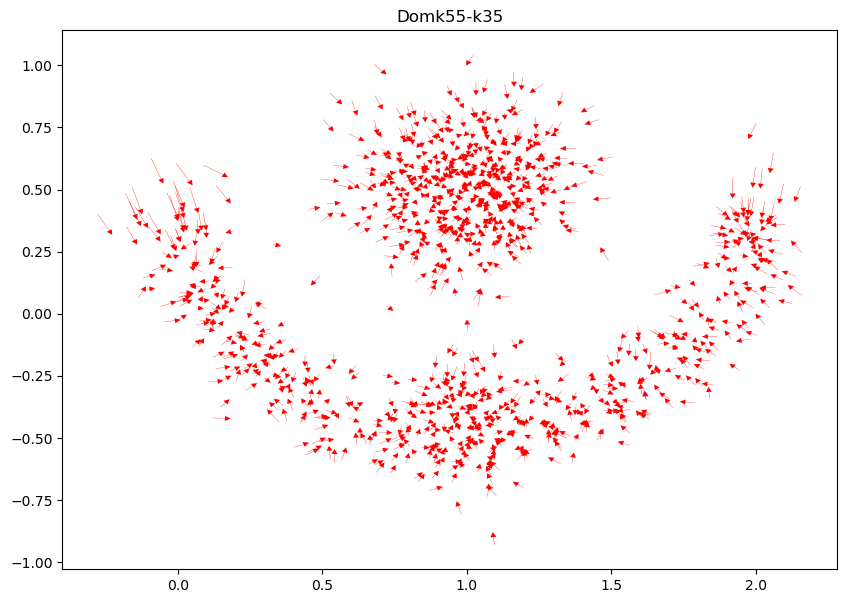

In [26]:
plt.figure(figsize=(10, 7))
# plt.scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='blue', s=20, marker='+')

# 绘制箭头
for j in range(len(downsampled_combined)):
    plt.arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], Dvector_k55_k35[j, 0], Dvector_k55_k35[j, 1], head_width=0.02, head_length=0.02, linewidth=0.02, fc='red', ec='red')
plt.title('Domk55-k35')
plt.show()

In [38]:
def MaxValueDetect(original_pixel_list,Dom, k):
    centroids = np.zeros(len(original_pixel_list))
    # Create a k-NN model
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(original_pixel_list)
    
    for i, centroid in enumerate(original_pixel_list):
        _, indices = knn.kneighbors([centroid])
        neighbors = Dom[indices[0]]
        
        neighbors = np.sqrt(np.sum(neighbors ** 2, axis=1))
        if np.sqrt(np.sum(Dom[i] ** 2)) == max(neighbors):
            centroids[i] = 1
        else:
            centroids[i] = 0

    return centroids

index = MaxValueDetect(downsampled_combined,Dvector_k55_k35, 10)
print(index)

[1. 0. 0. ... 0. 0. 0.]


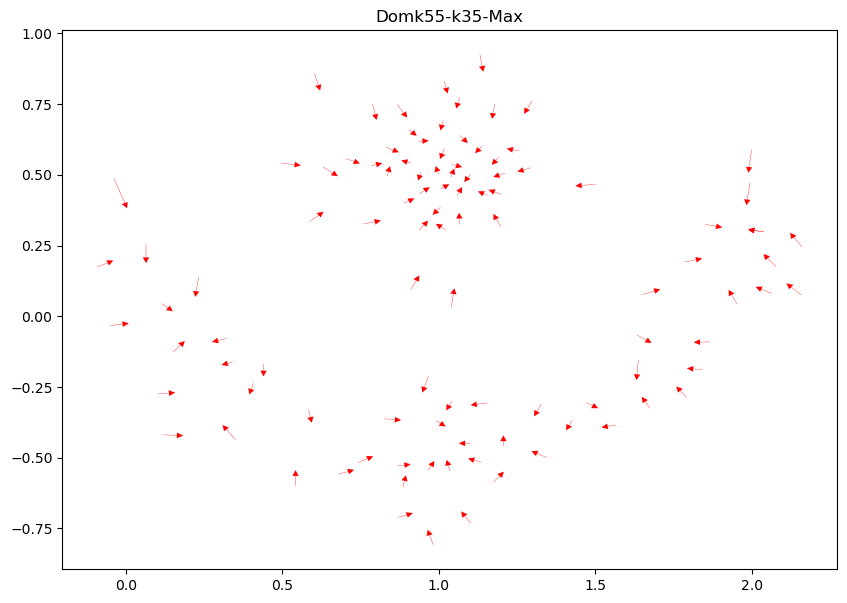

In [39]:
plt.figure(figsize=(10, 7))
# plt.scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='blue', s=20, marker='+')

# 绘制箭头
for j in range(len(downsampled_combined)):
    if index[j]:
        plt.arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], Dvector_k55_k35[j, 0], Dvector_k55_k35[j, 1], head_width=0.02, head_length=0.02, linewidth=0.02, fc='red', ec='red')
plt.title('Domk55-k35-Max')
plt.show()

In [46]:
def MaxValueDetect(original_pixel_list, Dom1, Dom2, k):
    centroids = np.zeros(len(original_pixel_list))
    # Create a k-NN model
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(original_pixel_list)

    for i, centroid in enumerate(original_pixel_list):
        _, indices = knn.kneighbors([centroid])
        neighbors = np.concatenate((Dom1[indices[0]], Dom2[indices[0]]), axis=0)
        neighbors = np.sqrt(np.sum(neighbors ** 2, axis=1))
        if np.sqrt(np.sum(Dom1[i] ** 2)) == max(neighbors) or np.sqrt(np.sum(Dom2[i] ** 2)) == max(neighbors):
            centroids[i] = 1
        else:
            centroids[i] = 0

    return centroids

index = MaxValueDetect(downsampled_combined, Dvector_k55_k35, Dvector_k35_k15, 10)
print(sum(index))

102.0


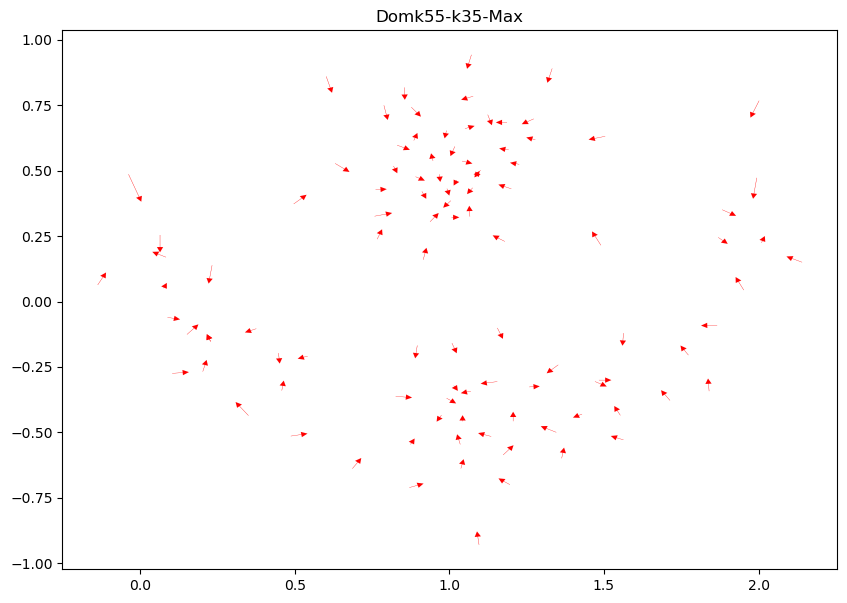

In [47]:
plt.figure(figsize=(10, 7))
# plt.scatter(downsampled_combined[:, 0], downsampled_combined[:, 1], c='blue', s=20, marker='+')

# 绘制箭头
for j in range(len(downsampled_combined)):
    if index[j]:
        plt.arrow(downsampled_combined[j, 0], downsampled_combined[j, 1], Dvector_k55_k35[j, 0], Dvector_k55_k35[j, 1], head_width=0.02, head_length=0.02, linewidth=0.02, fc='red', ec='red')
plt.title('Domk55-k35-k15-Max')
plt.show()